#Árvore de Decisão
## O que é?
Uma árvore de decisão é uma estrutura de árvore semelhante a um fluxograma, onde cada
nó interno (nó não folha) denota um teste em um atributo, cada ramo representa um resultado do teste e cada nó folha (ou nó terminal) contém um rótulo de classe.

Exemplo de árvore:
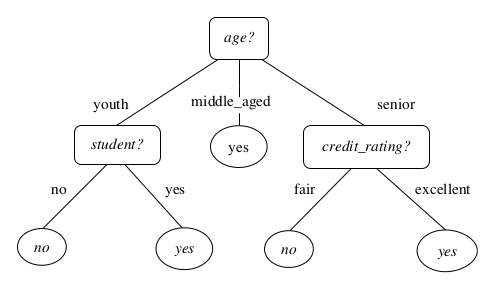
## Para que é usada?
Árvores de decisão são usadas na atribuição de rótulos ou classificação de tuplas com dados, ou conjunto de atributos.
## Por que é popular?

1.   A construção de classificadores de
árvores de decisão não requer nenhum conhecimento de domínio ou configuração de parâmetros
2.   Sua representação do conhecimento adquirido em forma de árvore é intuitiva e
geralmente fácil de assimilar pelos seres humanos
3.  Em geral, os classificadores de árvore de decisão têm boa precisão

## Algoritmo básico de Indução de Árvore de Decisão
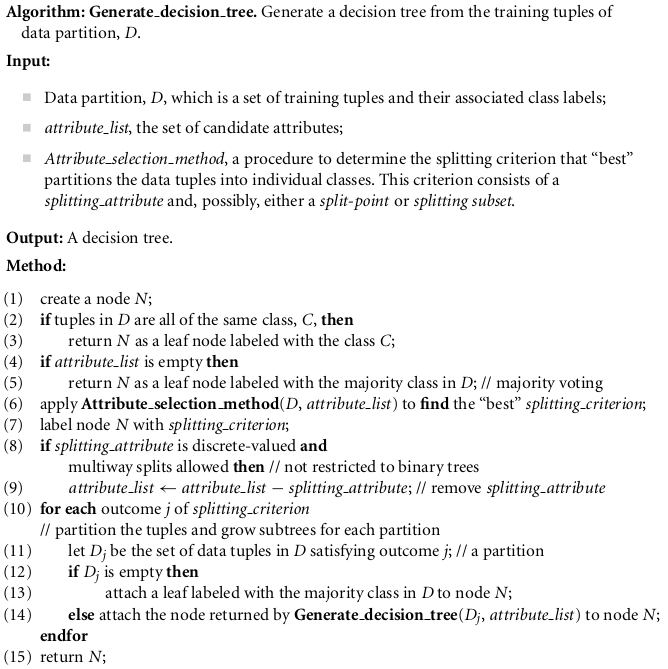


## O que são medidas de seleção de atributos?
Uma medida de seleção de atributo é uma heurística para selecionar o critério de divisão que
“melhor” separa uma determinada partição de dados, D, de tuplas de treinamento rotuladas de classe
em classes individuais.

A medida de seleção de atributo fornece uma classificação para cada atributo que descreve as
tuplas de treinamento fornecidas. O atributo com a melhor pontuação para a medida é escolhido
como atributo de divisão para as tuplas fornecidas.

##Ganho de informações

O atributo
com o maior ganho de informação é escolhido como atributo de divisão para o nó N. Este atributo minimiza as informações necessárias para classificar as tuplas nas partições resultantes e reflete a menor aleatoriedade ou “impureza” nessas partições.

##Como calcular?
A informação esperada necessária para classificar uma tupla em D é dada por:

> 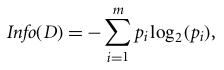

**pi**: probabilidade que uma tupla aleatoria de D tenha como classe Ci, que é igual a **|Ci,D|/|D|**

Se escolhermos um atributo **A** como critério de divisão, e esse atributo possuir **v** valores possiveis, a quantidade de informação necessária para classificar uma tupla será:

> 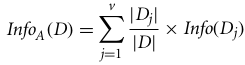

**Dj**: conjunto de tuplas que possuem A = aj

Assim o nosso ganho de informação ao escolher o atributo A será dado por:

> 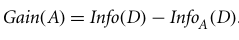


##Exemplo - Compra de Computador
O desafio consiste em definir de um cliente comprará ou não um computador baseado em alguns atributos.

Esse é nosso conjunto de dados:

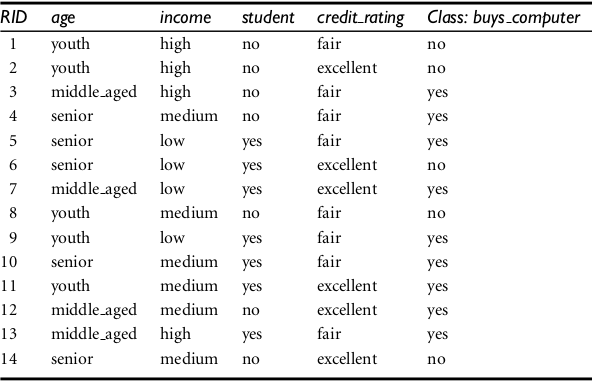

**buys_computer** é a coluna de classes, ele basícamente possue dois tipos de classe {yes, no}, temos 9 tuplas classificadas com **yes** e 5 com **no**. 

Vamos calcular o ganho inicialmente para o atributo **age**

Primeiro calculamos o quanto de informação precisamos para classificar uma tupla de D.

>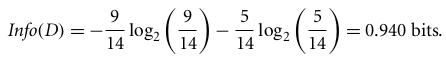

Agora calculamos a quantidade de informação que será necessária para classificar um tupla após divisão de tuplas com o atributos **age**.


>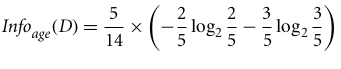

>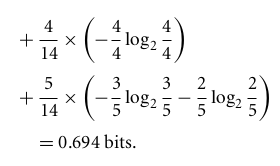

E por fim calculamos o ganho de informação que teremos se escolhermos **age**.


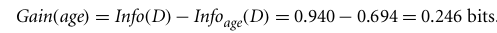

Da mesma forma calculamos os ganhos de informação para os outros atributos.

Gain(income) = 0.029 bits.

Gain(student) = 0.151 bits

Gain(credit rating) = 0.048 bits

Como **age** obteve o maior ganho, então escolhemos ele como o primeiro atributo de divisão.

Seguindo isso a nossa árvore inicialmente ficará assim:

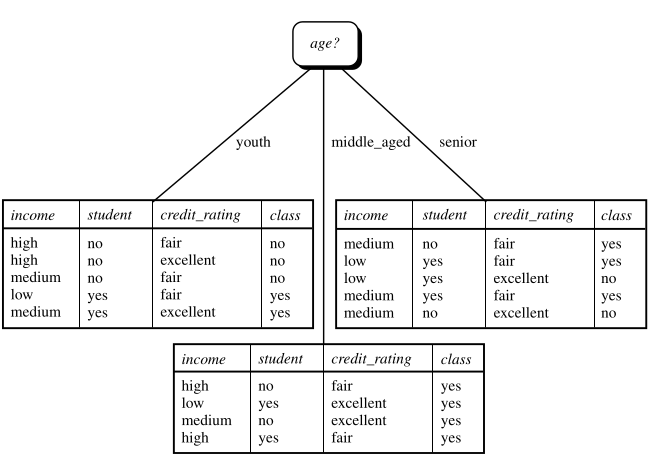

#Exemplo de aplicação
A seguir apresenta-se um código relativo a um problema clássico denominado titanic, que consiste basicamente em prever quais individuos sobreviverão ao acidente do titanic baseado em uma série de atributos.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [ ]:
# criacao de conjunto de treinamento
url_train = "https://raw.githubusercontent.com/jonhferreira/Machine-Learning/main/train.csv"
train = pd.read_csv(url_train)

train.head()

In [ ]:
# criacao de conjunto de teste
url_test = "https://raw.githubusercontent.com/jonhferreira/Machine-Learning/main/test.csv"
url_label_test = "https://raw.githubusercontent.com/jonhferreira/Machine-Learning/main/gender_submission.csv"

feat_test = pd.read_csv(url_test)
label_test = pd.read_csv(url_label_test)


feat_test.head()

In [ ]:
# informações do conjunto de treinamento
train.info()

In [ ]:
feat_test.info()

In [ ]:
# eliminação de tuplas com valores nulos
train["Age"] = train["Age"].fillna(train["Age"].mean())

feat_test["Age"] = feat_test["Age"].fillna(feat_test["Age"].mean())
feat_test["Fare"] = feat_test["Fare"].fillna(feat_test["Fare"].mean())
train.info()

In [ ]:
# separação de atributos e labels
label_train = train['Survived']
feat_train = train.drop(['Name','Ticket','Survived','Cabin'], axis=1)

#label_test = test['Survived']
feat_test = feat_test.drop(['Name','Ticket','Cabin'], axis=1)

feat_train

In [ ]:
def gerar_mapa(serie):
  valores_unicos = serie.unique()
  map_value = {np.nan:0}

  for i in range(len(valores_unicos)):
    if not(valores_unicos[i] is np.nan):
      map_value[valores_unicos[i]] = i+1

  return map_value


In [ ]:
# tratamento de conjunto de treinamento
map_sex = {'female':0,'male':1}
map_embarked = gerar_mapa(feat_train['Embarked'])


feat_train['Sex'] = feat_train['Sex'].map(map_sex)
feat_train['Embarked'] = feat_train['Embarked'].map(map_embarked)

feat_train.info()

In [ ]:
# Sobreviventes por sexo
train[['Sex','Survived']].value_counts().plot.bar()

In [ ]:
estimadorTree = tree.DecisionTreeClassifier()
estimadorTree.fit(feat_train,label_train)

estimadorBayes = GaussianNB()
estimadorBayes.fit(feat_train,label_train)

GaussianNB()

In [ ]:
#exibição de arvore de decisao
fig = pl.figure(figsize=(50,50))
_ = tree.plot_tree(estimadorTree, feature_names=feat_test.columns, class_names = ["0","1"])

In [ ]:
# tratamento de conjunto de teste

feat_test['Sex'] = feat_test['Sex'].map(map_sex)
feat_test['Embarked'] = feat_test['Embarked'].map(map_embarked)

feat_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [ ]:
# predicao de classificadores
prevTree = estimadorTree.predict(feat_test)
prevBayes = estimadorBayes.predict(feat_test)

label_test.info()

In [ ]:
# labels de teste para comparar
label_test = label_test.drop(["PassengerId"],axis=1)

# acuracia de árvore de decisao
accuracy_score(label_test,prevTree)

0.69377990430622

In [ ]:
# acuracia de classificador bayesiano
accuracy_score(label_test,prevBayes)

0.9258373205741627